In [1]:
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pyupbit as pb
df=pb.get_ohlcv("KRW-BTC",interval="day", count=4310)
df

,open,high,low,close,volume,value
2017-09-25 09:00:00+09:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26 09:00:00+09:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27 09:00:00+09:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28 09:00:00+09:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29 09:00:00+09:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...
2022-06-04 09:00:00+09:00,37852000.0,38100000.0,37666000.0,37916000.0,1401.312285,5.302511e+10
2022-06-05 09:00:00+09:00,37916000.0,38300000.0,37608000.0,37972000.0,1320.221687,4.998600e+10
2022-06-06 09:00:00+09:00,37974000.0,39952000.0,37966000.0,39532000.0,4372.224579,1.720418e+11
2022-06-07 09:00:00+09:00,39532000.0,39797000.0,37500000.0,39398000.0,7886.332468,3.032502e+11


In [4]:
seq = df[['close','open','high','low']].to_numpy() #종가, 오픈, 고가, 저가

In [26]:
seq

array([[ 4322000.,  4201000.,  4333000.,  4175000.],
       [ 4321000.,  4317000.,  4418000.,  4311000.],
       [ 4657000.,  4322000.,  4677000.,  4318000.],
       ...,
       [39550000., 37415000., 39989000., 37230000.],
       [39923000., 39527000., 40600000., 39300000.],
       [39753000., 39927000., 40150000., 39514000.]])

In [5]:
#시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[];Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x);Y.append(y)
    return np.array(X), np.array(Y)

In [6]:
w= 7 #윈도우 크기
h= 1 #수평선 계수

In [7]:
X, Y =seq2dataset(seq,w,h)  #다중 채널 데이터의 텐서모양과 내용
print(X.shape, Y.shape)
print(X[0],Y[0])

(1704, 7, 4) (1704, 4)
[[4322000. 4201000. 4333000. 4175000.]
 [4321000. 4317000. 4418000. 4311000.]
 [4657000. 4322000. 4677000. 4318000.]
 [4586000. 4657000. 4772000. 4519000.]
 [4657000. 4586000. 4709000. 4476000.]
 [4895000. 4657000. 4896000. 4651000.]
 [4962000. 4889000. 4978000. 4682000.]] [5025000. 4962000. 5095000. 4956000.]


- x의 텐서모양 = 1704x7x4
- y의 텐서모양 = 1704x4

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [9]:
# 훈련집합과 테스트 집합으로 분할
split=int(len(X)*0.8)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [12]:
#LSTM 모델의 설계와 학습
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist= model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
1363/1363 - 4s - loss: 1857373.8750 - mae: 1857373.8750 - val_loss: 2671387.5000 - val_mae: 2671387.5000 - 4s/epoch - 3ms/step
Epoch 2/200
1363/1363 - 3s - loss: 1205779.1250 - mae: 1205779.1250 - val_loss: 2016796.5000 - val_mae: 2016796.5000 - 3s/epoch - 2ms/step
Epoch 3/200
1363/1363 - 3s - loss: 913815.0000 - mae: 913815.0000 - val_loss: 1509852.2500 - val_mae: 1509852.2500 - 3s/epoch - 2ms/step
Epoch 4/200
1363/1363 - 3s - loss: 770300.2500 - mae: 770300.2500 - val_loss: 3492447.0000 - val_mae: 3492447.0000 - 3s/epoch - 2ms/step
Epoch 5/200
1363/1363 - 3s - loss: 664999.7500 - mae: 664999.7500 - val_loss: 1921045.3750 - val_mae: 1921045.3750 - 3s/epoch - 2ms/step
Epoch 6/200
1363/1363 - 3s - loss: 576665.5625 - mae: 576665.5625 - val_loss: 1389524.1250 - val_mae: 1389524.1250 - 3s/epoch - 2ms/step
Epoch 7/200
1363/1363 - 3s - loss: 510626.6875 - mae: 510626.6875 - val_loss: 1380562.7500 - val_mae: 1380562.7500 - 3s/epoch - 2ms/step
Epoch 8/200
1363/1363 - 3s - loss: 49

Epoch 61/200
1363/1363 - 3s - loss: 319382.8125 - mae: 319382.8125 - val_loss: 794766.5625 - val_mae: 794766.5625 - 3s/epoch - 2ms/step
Epoch 62/200
1363/1363 - 3s - loss: 321224.3125 - mae: 321224.3125 - val_loss: 789465.5000 - val_mae: 789465.5000 - 3s/epoch - 2ms/step
Epoch 63/200
1363/1363 - 3s - loss: 330498.2812 - mae: 330498.2812 - val_loss: 833424.8750 - val_mae: 833424.8750 - 3s/epoch - 2ms/step
Epoch 64/200
1363/1363 - 3s - loss: 339328.2188 - mae: 339328.2188 - val_loss: 809087.1250 - val_mae: 809087.1250 - 3s/epoch - 2ms/step
Epoch 65/200
1363/1363 - 3s - loss: 339467.8750 - mae: 339467.8750 - val_loss: 784171.3125 - val_mae: 784171.3125 - 3s/epoch - 2ms/step
Epoch 66/200
1363/1363 - 3s - loss: 336491.8438 - mae: 336491.8438 - val_loss: 698549.2500 - val_mae: 698549.2500 - 3s/epoch - 2ms/step
Epoch 67/200
1363/1363 - 3s - loss: 343859.7188 - mae: 343859.7188 - val_loss: 802653.5625 - val_mae: 802653.5625 - 3s/epoch - 2ms/step
Epoch 68/200
1363/1363 - 3s - loss: 332981.8125 

1363/1363 - 3s - loss: 320140.6875 - mae: 320140.6875 - val_loss: 694967.6250 - val_mae: 694967.6250 - 3s/epoch - 2ms/step
Epoch 122/200
1363/1363 - 3s - loss: 323099.1562 - mae: 323099.1562 - val_loss: 885021.3750 - val_mae: 885021.3750 - 3s/epoch - 2ms/step
Epoch 123/200
1363/1363 - 3s - loss: 318047.0625 - mae: 318047.0625 - val_loss: 948714.8125 - val_mae: 948714.8125 - 3s/epoch - 2ms/step
Epoch 124/200
1363/1363 - 3s - loss: 324551.4375 - mae: 324551.4375 - val_loss: 787581.0000 - val_mae: 787581.0000 - 3s/epoch - 2ms/step
Epoch 125/200
1363/1363 - 3s - loss: 324562.5938 - mae: 324562.5938 - val_loss: 1167635.5000 - val_mae: 1167635.5000 - 3s/epoch - 2ms/step
Epoch 126/200
1363/1363 - 3s - loss: 328380.0938 - mae: 328380.0938 - val_loss: 741889.6875 - val_mae: 741889.6875 - 3s/epoch - 2ms/step
Epoch 127/200
1363/1363 - 3s - loss: 321140.5312 - mae: 321140.5312 - val_loss: 682348.6250 - val_mae: 682348.6250 - 3s/epoch - 2ms/step
Epoch 128/200
1363/1363 - 3s - loss: 324433.0312 - ma

Epoch 181/200
1363/1363 - 3s - loss: 318310.8125 - mae: 318310.8125 - val_loss: 825856.9375 - val_mae: 825856.9375 - 3s/epoch - 2ms/step
Epoch 182/200
1363/1363 - 3s - loss: 317978.1562 - mae: 317978.1562 - val_loss: 738296.9375 - val_mae: 738296.9375 - 3s/epoch - 2ms/step
Epoch 183/200
1363/1363 - 3s - loss: 316502.5000 - mae: 316502.5000 - val_loss: 757391.0625 - val_mae: 757391.0625 - 3s/epoch - 2ms/step
Epoch 184/200
1363/1363 - 3s - loss: 315867.5000 - mae: 315867.5000 - val_loss: 757989.6250 - val_mae: 757989.6250 - 3s/epoch - 2ms/step
Epoch 185/200
1363/1363 - 3s - loss: 313459.3125 - mae: 313459.3125 - val_loss: 837937.1875 - val_mae: 837937.1875 - 3s/epoch - 2ms/step
Epoch 186/200
1363/1363 - 3s - loss: 314512.4062 - mae: 314512.4062 - val_loss: 719427.6875 - val_mae: 719427.6875 - 3s/epoch - 2ms/step
Epoch 187/200
1363/1363 - 3s - loss: 313531.6875 - mae: 313531.6875 - val_loss: 685195.7500 - val_mae: 685195.7500 - 3s/epoch - 2ms/step
Epoch 188/200
1363/1363 - 3s - loss: 3123

In [13]:
#LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실함수:",ev[0],"MAE:",ev[1])

손실함수: 881266.6875 MAE: 881266.6875


In [15]:
#LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("LSTM 평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

11/11 [==============================] - 0s 3ms/step
LSTM 평균절댓값백분율오차(MAPE): [0.02531107 0.00454477 0.01898953 0.01648505]


MAPE
- 종가: 2.53%
- 오픈: 0.45%
- 고가: 1.89%
- 저가: 1.64%

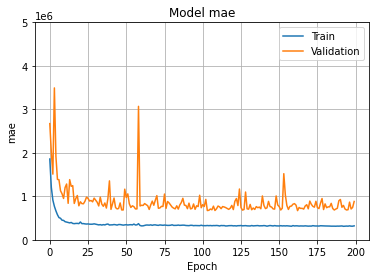

In [25]:
#학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([0,5000000])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()